In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
from fastprogress import master_bar, progress_bar
%matplotlib inline

In [2]:
ls

createCsv.py      features/         index.ipynb       nikkei_index.csv


In [3]:
df = pd.read_csv('nikkei_index.csv')

In [4]:
df.head()

,date,opening,high,low,ending
0,2007-01-04 00:00:00,17322.50,17379.46,17315.75,17353.66
1,2007-01-05 00:00:00,17315.53,17327.13,17011.09,17091.58
2,2007-01-09 00:00:00,17018.89,17261.02,16983.97,17237.76
3,2007-01-10 00:00:00,17192.41,17199.41,16847.57,16942.40
4,2007-01-11 00:00:00,16958.57,17057.44,16758.46,16838.16


In [5]:
len(df)

2620

In [6]:
ntest = 50
ntrain = len(df) - ntest

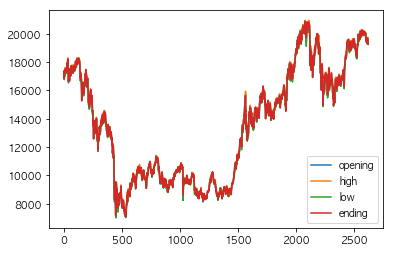

In [7]:
df.plot()

In [8]:
df['date'] = pd.to_datetime(df['date'])

from datetime import date, timedelta

base = df['date'][0]
date_time = []

for i in range(len(df)):
    date_time.append(base + timedelta(days = i))
    
df['date'] = date_time

In [9]:
df.head()

,date,opening,high,low,ending
0,2007-01-04,17322.50,17379.46,17315.75,17353.66
1,2007-01-05,17315.53,17327.13,17011.09,17091.58
2,2007-01-06,17018.89,17261.02,16983.97,17237.76
3,2007-01-07,17192.41,17199.41,16847.57,16942.40
4,2007-01-08,16958.57,17057.44,16758.46,16838.16


In [10]:
X = df[['date', 'ending']]
y = df['ending']

X_train = X[:ntrain]
y_train = y[:ntrain]
X_test = X[ntrain:].reset_index(drop=True)
y_test = y[ntrain:].reset_index(drop=True)

In [11]:
import math

X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day

X_train['day_cos'] = [
    round(
        math.cos(math.radians(d * 360 / 31)), 5
    ) for d in X_train['date'].dt.day
]
X_train['day_sin'] = [
    round(
        math.sin(math.radians(d * 360 / 12)), 5
    ) for d in X_train['date'].dt.day
]

X_train['month_cos'] = [
    round(
        math.cos(math.radians(d * 360 / 12)), 5
    ) for d in X_train['date'].dt.month
]
X_train['month_sin'] = [
    round(
        math.sin(math.radians(d * 360 / 12)), 5
    ) for d in X_train['date'].dt.month
]

X_train.drop(['date', 'ending'], axis=1, inplace=True)

X_test['year'] = X_test['date'].dt.year
X_test['month'] = X_test['date'].dt.month
X_test['day'] = X_test['date'].dt.day

X_test['day_cos'] = [
    round(
        math.cos(math.radians(d * 360 / 31)), 5
    ) for d in X_test['date'].dt.day
]
X_test['day_sin'] = [
    round(
        math.sin(math.radians(d * 360 / 31)), 5
    ) for d in X_test['date'].dt.day
]

X_test['month_cos'] = [
    round(
        math.cos(math.radians(d * 360 / 12)), 5
    ) for d in X_test['date'].dt.month
]
X_test['month_sin'] = [
    round(
        math.sin(math.radians(d * 360 / 12)), 5
    ) for d in X_test['date'].dt.month
]

X_test.drop(['date', 'ending'], axis=1, inplace=True)

/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithC

In [12]:
X_valid = X_train[(ntrain - ntest):].reset_index(drop=True)
y_valid = y_train[(ntrain - ntest):].reset_index(drop=True)
X_train2 = X_train[:(ntrain - ntest)]
y_train2 = y_train[:(ntrain - ntest)]

In [13]:
X_train.head()

,year,month,day,day_cos,day_sin,month_cos,month_sin
0,2007,1,4,0.68897,0.86603,0.86603,0.5
1,2007,1,5,0.52896,0.50000,0.86603,0.5
2,2007,1,6,0.34731,0.00000,0.86603,0.5
3,2007,1,7,0.15143,-0.50000,0.86603,0.5
4,2007,1,8,-0.05065,-0.86603,0.86603,0.5


In [14]:
y_valid

0     18355.26
1     18418.59
2     18432.20
3     18430.49
4     18620.75
5     18875.88
6     19079.33
7     19289.43
8     19251.87
9     19196.74
10    19310.52
11    19445.70
12    19895.70
13    19843.00
14    19900.09
15    19961.55
16    19883.90
17    19869.85
18    19919.82
19    19814.88
20    19553.86
21    19590.76
22    19678.28
23    19613.28
24    19742.98
25    19813.13
26    19686.84
27    19682.57
28    19677.85
29    19650.57
30    19860.03
31    20177.28
32    20170.82
33    19979.90
34    19984.62
35    19909.26
36    20013.26
37    19908.58
38    19898.75
39    19883.52
40    19831.82
41    19943.26
42    20067.75
43    20230.41
44    20138.79
45    20110.51
46    20132.67
47    20153.35
48    20225.09
49    20130.41
Name: ending, dtype: float64

In [15]:
X_valid.head()

,year,month,day,day_cos,day_sin,month_cos,month_sin
0,2013,11,28,0.82076,0.86603,0.86603,-0.5
1,2013,11,29,0.91896,0.50000,0.86603,-0.5
2,2013,11,30,0.97953,0.00000,0.86603,-0.5
3,2013,12,1,0.97953,0.50000,1.00000,-0.0
4,2013,12,2,0.91896,0.86603,1.00000,-0.0


In [16]:
import lightgbm as lgb

lgbm_params = {
    'learning_rate': 0.1,
    'num_leaves': 8,
    'boosting_type' : 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
}

def lgbm_train(X_train_df, X_valid_df, y_train_df, y_valid_df, lgbm_params):
    lgb_train = lgb.Dataset(X_train_df, y_train_df)
    lgb_eval = lgb.Dataset(X_valid_df, y_valid_df, reference=lgb_train)

    # 上記のパラメータでモデルを学習する
    model = lgb.train(lgbm_params, lgb_train,
                      # モデルの評価用データを渡す
                      valid_sets=lgb_eval,
                      # 最大で 1000 ラウンドまで学習する
                      num_boost_round=1000,
                      # 10 ラウンド経過しても性能が向上しないときは学習を打ち切る
                      early_stopping_rounds=10)
    
    return model

In [17]:
model = lgbm_train(X_train2, X_valid, y_train2, y_valid, lgbm_params)

[1]	valid_0's rmse: 5823.71
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 5395.25
[3]	valid_0's rmse: 5012.88
[4]	valid_0's rmse: 4655.19
[5]	valid_0's rmse: 4365.05
[6]	valid_0's rmse: 4081.07
[7]	valid_0's rmse: 3852.4
[8]	valid_0's rmse: 3628.43
[9]	valid_0's rmse: 3484.49
[10]	valid_0's rmse: 3307.71
[11]	valid_0's rmse: 3196.81
[12]	valid_0's rmse: 3065.03
[13]	valid_0's rmse: 2972.66
[14]	valid_0's rmse: 2865.16
[15]	valid_0's rmse: 2773.85
[16]	valid_0's rmse: 2710.61
[17]	valid_0's rmse: 2615.96
[18]	valid_0's rmse: 2550.68
[19]	valid_0's rmse: 2507.94
[20]	valid_0's rmse: 2448.15
[21]	valid_0's rmse: 2399.17
[22]	valid_0's rmse: 2357.34
[23]	valid_0's rmse: 2332.59
[24]	valid_0's rmse: 2287.31
[25]	valid_0's rmse: 2263.02
[26]	valid_0's rmse: 2158.77
[27]	valid_0's rmse: 2146.96
[28]	valid_0's rmse: 2110.81
[29]	valid_0's rmse: 2099.65
[30]	valid_0's rmse: 2091.03
[31]	valid_0's rmse: 2006.81
[32]	valid_0's rmse: 1991.72
[33]	valid_0's rmse:

In [18]:
from sklearn.metrics import mean_absolute_error
import numpy as np
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
np.sqrt(mean_absolute_error(y_test, y_pred))

52.931487911462071

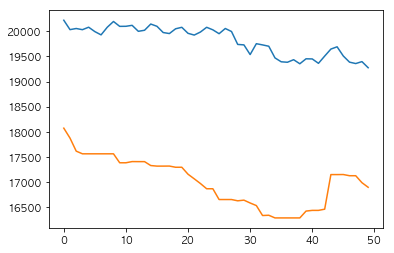

In [19]:
plt.plot(y_test)
plt.plot(y_pred)

In [20]:
X = df[['date', 'ending']]
y = df['ending']

X_train = X[:ntrain]
y_train = y[:ntrain]
X_test = X[ntrain:].reset_index(drop=True)
y_test = y[ntrain:].reset_index(drop=True)

In [21]:
X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day
# X_train.drop(['date', 'ending'], axis=1, inplace=True)

X_train['day_cos'] = [
    round(
        math.cos(math.radians(d * 360 / 31)), 5
    ) for d in X_train['date'].dt.day
]
X_train['day_sin'] = [
    round(
        math.sin(math.radians(d * 360 / 12)), 5
    ) for d in X_train['date'].dt.day
]

X_train['month_cos'] = [
    round(
        math.cos(math.radians(d * 360 / 12)), 5
    ) for d in X_train['date'].dt.month
]
X_train['month_sin'] = [
    round(
        math.sin(math.radians(d * 360 / 12)), 5
    ) for d in X_train['date'].dt.month
]

X_test['year'] = X_test['date'].dt.year
X_test['month'] = X_test['date'].dt.month
X_test['day'] = X_test['date'].dt.day

X_test['day_cos'] = [
    round(
        math.cos(math.radians(d * 360 / 31)), 5
    ) for d in X_test['date'].dt.day
]
X_test['day_sin'] = [
    round(
        math.sin(math.radians(d * 360 / 31)), 5
    ) for d in X_test['date'].dt.day
]

X_test['month_cos'] = [
    round(
        math.cos(math.radians(d * 360 / 12)), 5
    ) for d in X_test['date'].dt.month
]
X_test['month_sin'] = [
    round(
        math.sin(math.radians(d * 360 / 12)), 5
    ) for d in X_test['date'].dt.month
]

X_test.drop(['ending'], axis=1, inplace=True)

/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [22]:
data = pd.concat([X_train, X_test]).reset_index(drop=True)

/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [23]:
data.head()

,date,day,day_cos,day_sin,ending,month,month_cos,month_sin,year
0,2007-01-04,4,0.68897,0.86603,17353.66,1,0.86603,0.5,2007
1,2007-01-05,5,0.52896,0.50000,17091.58,1,0.86603,0.5,2007
2,2007-01-06,6,0.34731,0.00000,17237.76,1,0.86603,0.5,2007
3,2007-01-07,7,0.15143,-0.50000,16942.40,1,0.86603,0.5,2007
4,2007-01-08,8,-0.05065,-0.86603,16838.16,1,0.86603,0.5,2007


In [24]:
data.tail()

,date,day,day_cos,day_sin,ending,month,month_cos,month_sin,year
2615,2014-03-03,3,0.82076,0.57127,NaN,3,0.0,1.0,2014
2616,2014-03-04,4,0.68897,0.72479,NaN,3,0.0,1.0,2014
2617,2014-03-05,5,0.52896,0.84864,NaN,3,0.0,1.0,2014
2618,2014-03-06,6,0.34731,0.93775,NaN,3,0.0,1.0,2014
2619,2014-03-07,7,0.15143,0.98847,NaN,3,0.0,1.0,2014


## day feature

In [25]:
for d in range(ntest):
    for lag in range(1, 3):
        feat_name = 'day_lag'+ str(lag) + '_day' + str(d)
        df = pd.DataFrame({
            'date': data['date'] + pd.DateOffset(lag+d),
            'ending_' + feat_name: data['ending']
        })
        df = pd.merge(data, df, on=['date'], how='left')
        train = pd.DataFrame(df['ending_' + feat_name])[:ntrain]
        test = pd.DataFrame(df['ending_' + feat_name])[ntrain:].reset_index(drop=True)
        train.to_feather(f'features/{feat_name}_train.feather')
        test.to_feather(f'features/{feat_name}_test.feather')

## week feature

In [26]:
for d in range(ntest):
    for lag in range(1, 3):
        feat_name = 'mean_week_lag'+ str(lag) + '_day' + str(d)
        sel = pd.Series(range(1, 8)) + (lag - 1) * 7 + d
        df = []
        for i in sel:
            tmp = pd.DataFrame({
                'date': data['date'] + pd.DateOffset(i),
                'ending_' + feat_name: data['ending']
            })
            df.append(tmp)
        df = pd.concat(df)
        df = df.groupby(['date'])['ending_' + feat_name].mean().reset_index()
        df = pd.merge(data, df, on=['date'], how='left')
        train = pd.DataFrame(df['ending_' + feat_name])[:ntrain]
        test = pd.DataFrame(df['ending_' + feat_name])[ntrain:].reset_index(drop=True)
        train.to_feather(f'features/{feat_name}_train.feather')
        test.to_feather(f'features/{feat_name}_test.feather')

In [27]:
import feather


def load_datasets(feats):
    dfs = [feather.read_dataframe(f'features/{f}_train.feather') for f in feats]
    X_train = pd.concat(dfs, axis=1)
    dfs = [feather.read_dataframe(f'features/{f}_test.feather') for f in feats]
    X_test = pd.concat(dfs, axis=1)
    return X_train, X_test

In [28]:
val_score = []
y_pred2 = []

for d in range(ntest):
    feats = [
        'day_lag1_day' + str(d),
        'day_lag2_day' + str(d),
        'mean_week_lag1_day' + str(d),
        'mean_week_lag2_day' + str(d)
    ]

    feather_train, feather_test = load_datasets(feats)

    X_train_tmp = pd.concat([X_train, feather_train], axis=1)
    X_test_tmp = pd.concat([X_test, feather_test], axis=1)

    X_train_tmp.drop(['date', 'ending'], axis=1, inplace=True)
    X_test_tmp.drop(['date'], axis=1, inplace=True)

    X_valid = X_train_tmp[(ntrain - ntest):].reset_index(drop=True)
    y_valid = y_train[(ntrain - ntest):].reset_index(drop=True)
    X_train2 = X_train_tmp[:(ntrain - ntest)]
    y_train2 = y_train[:(ntrain - ntest)]

    model_day = lgbm_train(X_train2, X_valid, y_train2, y_valid, lgbm_params)
    val_score.append(model_day.best_score['valid_0']['rmse'])
    
    yp = model_day.predict(X_test_tmp, num_iteration=model_day.best_iteration)
    y_pred2.append(yp[d])

[1]	valid_0's rmse: 5703.01
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 5154.34
[3]	valid_0's rmse: 4653.75
[4]	valid_0's rmse: 4197.61
[5]	valid_0's rmse: 3803.96
[6]	valid_0's rmse: 3416.24
[7]	valid_0's rmse: 3091.51
[8]	valid_0's rmse: 2774.42
[9]	valid_0's rmse: 2488.61
[10]	valid_0's rmse: 2233.18
[11]	valid_0's rmse: 2013.82
[12]	valid_0's rmse: 1824.8
[13]	valid_0's rmse: 1655.89
[14]	valid_0's rmse: 1492.64
[15]	valid_0's rmse: 1358.68
[16]	valid_0's rmse: 1221.39
[17]	valid_0's rmse: 1114.71
[18]	valid_0's rmse: 1013.41
[19]	valid_0's rmse: 918.341
[20]	valid_0's rmse: 828.475
[21]	valid_0's rmse: 759.141
[22]	valid_0's rmse: 684.446
[23]	valid_0's rmse: 625.993
[24]	valid_0's rmse: 574.044
[25]	valid_0's rmse: 528.142
[26]	valid_0's rmse: 479.952
[27]	valid_0's rmse: 441.889
[28]	valid_0's rmse: 406.49
[29]	valid_0's rmse: 378.343
[30]	valid_0's rmse: 352.408
[31]	valid_0's rmse: 328.3
[32]	valid_0's rmse: 303.56
[33]	valid_0's rmse: 286

[9]	valid_0's rmse: 2636.84
[10]	valid_0's rmse: 2390.71
[11]	valid_0's rmse: 2181.67
[12]	valid_0's rmse: 1978.44
[13]	valid_0's rmse: 1798.94
[14]	valid_0's rmse: 1656.93
[15]	valid_0's rmse: 1515.64
[16]	valid_0's rmse: 1401.65
[17]	valid_0's rmse: 1302.13
[18]	valid_0's rmse: 1212.91
[19]	valid_0's rmse: 1148.36
[20]	valid_0's rmse: 1060.77
[21]	valid_0's rmse: 1010.31
[22]	valid_0's rmse: 952.708
[23]	valid_0's rmse: 909.706
[24]	valid_0's rmse: 852.64
[25]	valid_0's rmse: 824.954
[26]	valid_0's rmse: 793.611
[27]	valid_0's rmse: 752.659
[28]	valid_0's rmse: 732.63
[29]	valid_0's rmse: 723.527
[30]	valid_0's rmse: 708.654
[31]	valid_0's rmse: 686.985
[32]	valid_0's rmse: 673.409
[33]	valid_0's rmse: 651.093
[34]	valid_0's rmse: 645.311
[35]	valid_0's rmse: 635.576
[36]	valid_0's rmse: 622.078
[37]	valid_0's rmse: 608.406
[38]	valid_0's rmse: 601.14
[39]	valid_0's rmse: 591.532
[40]	valid_0's rmse: 587.766
[41]	valid_0's rmse: 580.618
[42]	valid_0's rmse: 575.558
[43]	valid_0's rms

[23]	valid_0's rmse: 1080.07
[24]	valid_0's rmse: 1025.62
[25]	valid_0's rmse: 1026.29
[26]	valid_0's rmse: 992.757
[27]	valid_0's rmse: 972.555
[28]	valid_0's rmse: 936.836
[29]	valid_0's rmse: 882.225
[30]	valid_0's rmse: 854.334
[31]	valid_0's rmse: 836.316
[32]	valid_0's rmse: 813.886
[33]	valid_0's rmse: 782.084
[34]	valid_0's rmse: 767.279
[35]	valid_0's rmse: 757.187
[36]	valid_0's rmse: 745.521
[37]	valid_0's rmse: 734.848
[38]	valid_0's rmse: 725.506
[39]	valid_0's rmse: 719.772
[40]	valid_0's rmse: 710.038
[41]	valid_0's rmse: 708.294
[42]	valid_0's rmse: 709.996
[43]	valid_0's rmse: 692.889
[44]	valid_0's rmse: 686.982
[45]	valid_0's rmse: 690.891
[46]	valid_0's rmse: 685.189
[47]	valid_0's rmse: 683.944
[48]	valid_0's rmse: 688.107
[49]	valid_0's rmse: 674.466
[50]	valid_0's rmse: 670.531
[51]	valid_0's rmse: 669.536
[52]	valid_0's rmse: 671.644
[53]	valid_0's rmse: 665.845
[54]	valid_0's rmse: 660.107
[55]	valid_0's rmse: 657.333
[56]	valid_0's rmse: 656.407
[57]	valid_0's

[1]	valid_0's rmse: 5706.92
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 5173.7
[3]	valid_0's rmse: 4746.15
[4]	valid_0's rmse: 4316.1
[5]	valid_0's rmse: 3971.58
[6]	valid_0's rmse: 3657.66
[7]	valid_0's rmse: 3339.45
[8]	valid_0's rmse: 3083.53
[9]	valid_0's rmse: 2845.17
[10]	valid_0's rmse: 2664.83
[11]	valid_0's rmse: 2478.96
[12]	valid_0's rmse: 2335.24
[13]	valid_0's rmse: 2187.87
[14]	valid_0's rmse: 2039.24
[15]	valid_0's rmse: 1907.79
[16]	valid_0's rmse: 1802.32
[17]	valid_0's rmse: 1696.08
[18]	valid_0's rmse: 1612.16
[19]	valid_0's rmse: 1495.78
[20]	valid_0's rmse: 1421.44
[21]	valid_0's rmse: 1364.46
[22]	valid_0's rmse: 1319.97
[23]	valid_0's rmse: 1287.88
[24]	valid_0's rmse: 1225.5
[25]	valid_0's rmse: 1180.96
[26]	valid_0's rmse: 1145.19
[27]	valid_0's rmse: 1122.19
[28]	valid_0's rmse: 1094.71
[29]	valid_0's rmse: 1070.89
[30]	valid_0's rmse: 1054.28
[31]	valid_0's rmse: 1052.41
[32]	valid_0's rmse: 1034.86
[33]	valid_0's rmse: 1

[104]	valid_0's rmse: 896.461
[105]	valid_0's rmse: 894.915
[106]	valid_0's rmse: 895.963
[107]	valid_0's rmse: 896.305
[108]	valid_0's rmse: 892.794
[109]	valid_0's rmse: 894.225
[110]	valid_0's rmse: 892.06
[111]	valid_0's rmse: 892.393
[112]	valid_0's rmse: 882.528
[113]	valid_0's rmse: 881.205
[114]	valid_0's rmse: 880.464
[115]	valid_0's rmse: 881.311
[116]	valid_0's rmse: 882.933
[117]	valid_0's rmse: 883.817
[118]	valid_0's rmse: 881.412
[119]	valid_0's rmse: 881.137
[120]	valid_0's rmse: 871.851
[121]	valid_0's rmse: 873.305
[122]	valid_0's rmse: 873.702
[123]	valid_0's rmse: 872.035
[124]	valid_0's rmse: 868.341
[125]	valid_0's rmse: 869.29
[126]	valid_0's rmse: 867.435
[127]	valid_0's rmse: 865.576
[128]	valid_0's rmse: 870.018
[129]	valid_0's rmse: 869.951
[130]	valid_0's rmse: 870.26
[131]	valid_0's rmse: 866.015
[132]	valid_0's rmse: 866.04
[133]	valid_0's rmse: 866.487
[134]	valid_0's rmse: 864.695
[135]	valid_0's rmse: 862.973
[136]	valid_0's rmse: 863.089
[137]	valid_0'

[43]	valid_0's rmse: 1257.39
[44]	valid_0's rmse: 1258.92
[45]	valid_0's rmse: 1249
[46]	valid_0's rmse: 1243.68
[47]	valid_0's rmse: 1238.95
[48]	valid_0's rmse: 1241.55
[49]	valid_0's rmse: 1243.07
[50]	valid_0's rmse: 1234.48
[51]	valid_0's rmse: 1196.87
[52]	valid_0's rmse: 1191.13
[53]	valid_0's rmse: 1190.04
[54]	valid_0's rmse: 1189.85
[55]	valid_0's rmse: 1157.27
[56]	valid_0's rmse: 1137.42
[57]	valid_0's rmse: 1121.98
[58]	valid_0's rmse: 1115.98
[59]	valid_0's rmse: 1107.02
[60]	valid_0's rmse: 1094.28
[61]	valid_0's rmse: 1095.76
[62]	valid_0's rmse: 1070.67
[63]	valid_0's rmse: 1067.56
[64]	valid_0's rmse: 1066.88
[65]	valid_0's rmse: 1064.92
[66]	valid_0's rmse: 1068.09
[67]	valid_0's rmse: 1061.26
[68]	valid_0's rmse: 1061.42
[69]	valid_0's rmse: 1051.09
[70]	valid_0's rmse: 1041.69
[71]	valid_0's rmse: 1036.17
[72]	valid_0's rmse: 1040.43
[73]	valid_0's rmse: 1034.09
[74]	valid_0's rmse: 1034.45
[75]	valid_0's rmse: 1033.72
[76]	valid_0's rmse: 1034.5
[77]	valid_0's rms

[80]	valid_0's rmse: 1150.25
[81]	valid_0's rmse: 1144.13
[82]	valid_0's rmse: 1144.23
[83]	valid_0's rmse: 1125.71
[84]	valid_0's rmse: 1125.71
[85]	valid_0's rmse: 1126.62
[86]	valid_0's rmse: 1127.67
[87]	valid_0's rmse: 1126.87
[88]	valid_0's rmse: 1109.39
[89]	valid_0's rmse: 1110.42
[90]	valid_0's rmse: 1110.44
[91]	valid_0's rmse: 1110.49
[92]	valid_0's rmse: 1106.56
[93]	valid_0's rmse: 1106.55
[94]	valid_0's rmse: 1101.64
[95]	valid_0's rmse: 1102
[96]	valid_0's rmse: 1103.11
[97]	valid_0's rmse: 1102.96
[98]	valid_0's rmse: 1106.91
[99]	valid_0's rmse: 1111.37
[100]	valid_0's rmse: 1087.16
[101]	valid_0's rmse: 1087.89
[102]	valid_0's rmse: 1083.07
[103]	valid_0's rmse: 1084.98
[104]	valid_0's rmse: 1063.57
[105]	valid_0's rmse: 1062.56
[106]	valid_0's rmse: 1061.42
[107]	valid_0's rmse: 1061.62
[108]	valid_0's rmse: 1042.55
[109]	valid_0's rmse: 1044.92
[110]	valid_0's rmse: 1045.24
[111]	valid_0's rmse: 1041.24
[112]	valid_0's rmse: 1025.22
[113]	valid_0's rmse: 1026.33
[11

[1]	valid_0's rmse: 5728.52
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 5211.59
[3]	valid_0's rmse: 4793.45
[4]	valid_0's rmse: 4409.8
[5]	valid_0's rmse: 4061.88
[6]	valid_0's rmse: 3753.78
[7]	valid_0's rmse: 3473.99
[8]	valid_0's rmse: 3242.88
[9]	valid_0's rmse: 3019.37
[10]	valid_0's rmse: 2853.82
[11]	valid_0's rmse: 2685.02
[12]	valid_0's rmse: 2547.6
[13]	valid_0's rmse: 2402.21
[14]	valid_0's rmse: 2293.03
[15]	valid_0's rmse: 2179.26
[16]	valid_0's rmse: 2096.23
[17]	valid_0's rmse: 2036.36
[18]	valid_0's rmse: 1965.18
[19]	valid_0's rmse: 1921.65
[20]	valid_0's rmse: 1866.35
[21]	valid_0's rmse: 1817.51
[22]	valid_0's rmse: 1787.01
[23]	valid_0's rmse: 1747.64
[24]	valid_0's rmse: 1714.53
[25]	valid_0's rmse: 1684.93
[26]	valid_0's rmse: 1648.11
[27]	valid_0's rmse: 1623.36
[28]	valid_0's rmse: 1619.04
[29]	valid_0's rmse: 1601.28
[30]	valid_0's rmse: 1570.64
[31]	valid_0's rmse: 1572.73
[32]	valid_0's rmse: 1557.71
[33]	valid_0's rmse: 

[86]	valid_0's rmse: 1140.21
[87]	valid_0's rmse: 1141.71
[88]	valid_0's rmse: 1147.31
[89]	valid_0's rmse: 1148.67
[90]	valid_0's rmse: 1148.84
[91]	valid_0's rmse: 1149.58
[92]	valid_0's rmse: 1149.77
Early stopping, best iteration is:
[82]	valid_0's rmse: 1138.45
[1]	valid_0's rmse: 5772.93
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 5256.78
[3]	valid_0's rmse: 4826.24
[4]	valid_0's rmse: 4444.28
[5]	valid_0's rmse: 4103.75
[6]	valid_0's rmse: 3793.59
[7]	valid_0's rmse: 3522.85
[8]	valid_0's rmse: 3279.43
[9]	valid_0's rmse: 3066.89
[10]	valid_0's rmse: 2880.14
[11]	valid_0's rmse: 2716.03
[12]	valid_0's rmse: 2548.81
[13]	valid_0's rmse: 2434.46
[14]	valid_0's rmse: 2307.56
[15]	valid_0's rmse: 2217.85
[16]	valid_0's rmse: 2149.39
[17]	valid_0's rmse: 2073.05
[18]	valid_0's rmse: 2006.56
[19]	valid_0's rmse: 1948.84
[20]	valid_0's rmse: 1914.1
[21]	valid_0's rmse: 1878.39
[22]	valid_0's rmse: 1849.27
[23]	valid_0's rmse: 1802.62
[24]	valid_0's

[37]	valid_0's rmse: 1491.99
[38]	valid_0's rmse: 1487.16
[39]	valid_0's rmse: 1487.14
[40]	valid_0's rmse: 1483.16
[41]	valid_0's rmse: 1471.99
[42]	valid_0's rmse: 1473.32
[43]	valid_0's rmse: 1421.59
[44]	valid_0's rmse: 1423.43
[45]	valid_0's rmse: 1415.86
[46]	valid_0's rmse: 1412.58
[47]	valid_0's rmse: 1405.16
[48]	valid_0's rmse: 1400.72
[49]	valid_0's rmse: 1395.8
[50]	valid_0's rmse: 1391.9
[51]	valid_0's rmse: 1394.5
[52]	valid_0's rmse: 1387.14
[53]	valid_0's rmse: 1351.66
[54]	valid_0's rmse: 1356.28
[55]	valid_0's rmse: 1342.29
[56]	valid_0's rmse: 1337.45
[57]	valid_0's rmse: 1325.26
[58]	valid_0's rmse: 1331.15
[59]	valid_0's rmse: 1330.65
[60]	valid_0's rmse: 1328.12
[61]	valid_0's rmse: 1332.24
[62]	valid_0's rmse: 1325.4
[63]	valid_0's rmse: 1324.29
[64]	valid_0's rmse: 1294.83
[65]	valid_0's rmse: 1293.9
[66]	valid_0's rmse: 1297.64
[67]	valid_0's rmse: 1291.24
[68]	valid_0's rmse: 1263.38
[69]	valid_0's rmse: 1239.98
[70]	valid_0's rmse: 1243.31
[71]	valid_0's rmse

[30]	valid_0's rmse: 1700.51
[31]	valid_0's rmse: 1683.54
[32]	valid_0's rmse: 1626.59
[33]	valid_0's rmse: 1618.76
[34]	valid_0's rmse: 1619.03
[35]	valid_0's rmse: 1582.52
[36]	valid_0's rmse: 1580.17
[37]	valid_0's rmse: 1580.18
[38]	valid_0's rmse: 1575.84
[39]	valid_0's rmse: 1571.49
[40]	valid_0's rmse: 1561.51
[41]	valid_0's rmse: 1517.44
[42]	valid_0's rmse: 1510.7
[43]	valid_0's rmse: 1505.57
[44]	valid_0's rmse: 1470.75
[45]	valid_0's rmse: 1443.26
[46]	valid_0's rmse: 1435.23
[47]	valid_0's rmse: 1433.39
[48]	valid_0's rmse: 1436.47
[49]	valid_0's rmse: 1407.81
[50]	valid_0's rmse: 1410.4
[51]	valid_0's rmse: 1406.23
[52]	valid_0's rmse: 1399.12
[53]	valid_0's rmse: 1398.14
[54]	valid_0's rmse: 1381.33
[55]	valid_0's rmse: 1380.17
[56]	valid_0's rmse: 1370.68
[57]	valid_0's rmse: 1369.67
[58]	valid_0's rmse: 1369.29
[59]	valid_0's rmse: 1361.56
[60]	valid_0's rmse: 1358.86
[61]	valid_0's rmse: 1362.14
[62]	valid_0's rmse: 1371.23
[63]	valid_0's rmse: 1370.7
[64]	valid_0's rm

[20]	valid_0's rmse: 2006.89
[21]	valid_0's rmse: 1968.74
[22]	valid_0's rmse: 1904.83
[23]	valid_0's rmse: 1857.41
[24]	valid_0's rmse: 1825.28
[25]	valid_0's rmse: 1820.59
[26]	valid_0's rmse: 1792.74
[27]	valid_0's rmse: 1735.71
[28]	valid_0's rmse: 1725.77
[29]	valid_0's rmse: 1712.61
[30]	valid_0's rmse: 1693.49
[31]	valid_0's rmse: 1683.04
[32]	valid_0's rmse: 1620.13
[33]	valid_0's rmse: 1617.73
[34]	valid_0's rmse: 1610.12
[35]	valid_0's rmse: 1609.68
[36]	valid_0's rmse: 1608.07
[37]	valid_0's rmse: 1602.57
[38]	valid_0's rmse: 1571.6
[39]	valid_0's rmse: 1571.74
[40]	valid_0's rmse: 1550.7
[41]	valid_0's rmse: 1546.86
[42]	valid_0's rmse: 1520.89
[43]	valid_0's rmse: 1517.72
[44]	valid_0's rmse: 1519.65
[45]	valid_0's rmse: 1513.87
[46]	valid_0's rmse: 1488.41
[47]	valid_0's rmse: 1479.81
[48]	valid_0's rmse: 1483.67
[49]	valid_0's rmse: 1486.63
[50]	valid_0's rmse: 1473.43
[51]	valid_0's rmse: 1472.08
[52]	valid_0's rmse: 1436.94
[53]	valid_0's rmse: 1435.73
[54]	valid_0's r

[1]	valid_0's rmse: 5787.06
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 5325
[3]	valid_0's rmse: 4901.19
[4]	valid_0's rmse: 4526.23
[5]	valid_0's rmse: 4210.65
[6]	valid_0's rmse: 3917.52
[7]	valid_0's rmse: 3647.56
[8]	valid_0's rmse: 3418.35
[9]	valid_0's rmse: 3234.77
[10]	valid_0's rmse: 3088.12
[11]	valid_0's rmse: 2925.96
[12]	valid_0's rmse: 2793.97
[13]	valid_0's rmse: 2689.38
[14]	valid_0's rmse: 2582.65
[15]	valid_0's rmse: 2472.65
[16]	valid_0's rmse: 2383.88
[17]	valid_0's rmse: 2295.36
[18]	valid_0's rmse: 2231.4
[19]	valid_0's rmse: 2181.03
[20]	valid_0's rmse: 2119.92
[21]	valid_0's rmse: 2057.97
[22]	valid_0's rmse: 2002.65
[23]	valid_0's rmse: 1963.25
[24]	valid_0's rmse: 1928
[25]	valid_0's rmse: 1890.74
[26]	valid_0's rmse: 1862.03
[27]	valid_0's rmse: 1840.58
[28]	valid_0's rmse: 1770.99
[29]	valid_0's rmse: 1750.29
[30]	valid_0's rmse: 1680.46
[31]	valid_0's rmse: 1657.11
[32]	valid_0's rmse: 1658.01
[33]	valid_0's rmse: 1651.

[84]	valid_0's rmse: 1376.79
[85]	valid_0's rmse: 1376.57
[86]	valid_0's rmse: 1375.1
[87]	valid_0's rmse: 1355.47
[88]	valid_0's rmse: 1354.19
[89]	valid_0's rmse: 1348.83
[90]	valid_0's rmse: 1348.25
[91]	valid_0's rmse: 1344.67
[92]	valid_0's rmse: 1328.12
[93]	valid_0's rmse: 1328.79
[94]	valid_0's rmse: 1326.32
[95]	valid_0's rmse: 1315.71
[96]	valid_0's rmse: 1314.59
[97]	valid_0's rmse: 1315.31
[98]	valid_0's rmse: 1314.05
[99]	valid_0's rmse: 1308.96
[100]	valid_0's rmse: 1306.34
[101]	valid_0's rmse: 1305.87
[102]	valid_0's rmse: 1305.36
[103]	valid_0's rmse: 1304.84
[104]	valid_0's rmse: 1298.38
[105]	valid_0's rmse: 1298.54
[106]	valid_0's rmse: 1298.4
[107]	valid_0's rmse: 1297.98
[108]	valid_0's rmse: 1298.28
[109]	valid_0's rmse: 1293.32
[110]	valid_0's rmse: 1290.47
[111]	valid_0's rmse: 1288.46
[112]	valid_0's rmse: 1287.89
[113]	valid_0's rmse: 1285.64
[114]	valid_0's rmse: 1273.56
[115]	valid_0's rmse: 1273.28
[116]	valid_0's rmse: 1268.93
[117]	valid_0's rmse: 1269.8

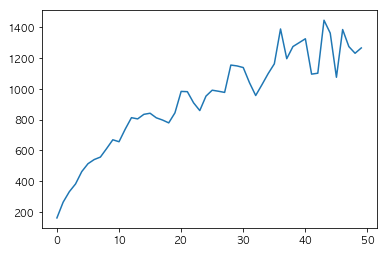

In [29]:
plt.plot(val_score)

In [30]:
np.sqrt(mean_absolute_error(y_test, y_pred2))

45.008044461767696

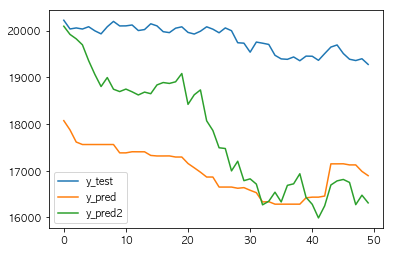

In [31]:
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.plot(y_pred2, label='y_pred2')
plt.legend()